In [1]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults
from sklearn.model_selection import train_test_split
from pylab import rcParams


In [3]:
data=pd.read_csv("CH4_CO.csv")

In [4]:
data

,time,CH4,CO
0,2015-01-01 0:00,2.1,0.79
1,2015-01-01 1:00,2.1,0.8
2,2015-01-01 2:00,2.1,0.71
3,2015-01-01 3:00,2,0.66
4,2015-01-01 4:00,2,0.53
...,...,...,...
8755,2015-12-31 19:00,2,1.04
8756,2015-12-31 20:00,2,0.87
8757,2015-12-31 21:00,2,0.79
8758,2015-12-31 22:00,2,0.79


In [5]:
temp=data['time'].values
temp2 = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M") for x in temp]
data['time'] = temp2

del temp,temp2

In [6]:
data['time'].values

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000', ...,
       '2015-12-31T21:00:00.000000000', '2015-12-31T22:00:00.000000000',
       '2015-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
data

,time,CH4,CO
0,2015-01-01 00:00:00,2.1,0.79
1,2015-01-01 01:00:00,2.1,0.8
2,2015-01-01 02:00:00,2.1,0.71
3,2015-01-01 03:00:00,2,0.66
4,2015-01-01 04:00:00,2,0.53
...,...,...,...
8755,2015-12-31 19:00:00,2,1.04
8756,2015-12-31 20:00:00,2,0.87
8757,2015-12-31 21:00:00,2,0.79
8758,2015-12-31 22:00:00,2,0.79


In [8]:
cols=['time','CH4','CO']

In [9]:
drop_column_for_CH4=['CO']
data.drop(drop_column_for_CH4,axis=1,inplace=True)
data=data.sort_values('time')

In [10]:
data

,time,CH4
0,2015-01-01 00:00:00,2.1
1,2015-01-01 01:00:00,2.1
2,2015-01-01 02:00:00,2.1
3,2015-01-01 03:00:00,2
4,2015-01-01 04:00:00,2
...,...,...
8755,2015-12-31 19:00:00,2
8756,2015-12-31 20:00:00,2
8757,2015-12-31 21:00:00,2
8758,2015-12-31 22:00:00,2


In [11]:
data=data.sort_values('time')

In [12]:
data.isnull().sum()

time     0
CH4     10
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

time    0
CH4     0
dtype: int64

In [15]:
data = data.groupby('time')['CH4'].sum().reset_index()

In [16]:
data.isnull().sum()

time    0
CH4     0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

time    0
CH4     0
dtype: int64

In [19]:
type(data.CH4[0])

str

In [20]:
data['CH4'] = pd.to_numeric(data.CH4.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(float)

In [21]:
data

,time,CH4
0,2015-01-01 00:00:00,2.1
1,2015-01-01 01:00:00,2.1
2,2015-01-01 02:00:00,2.1
3,2015-01-01 03:00:00,2.0
4,2015-01-01 04:00:00,2.0
...,...,...
8745,2015-12-31 19:00:00,2.0
8746,2015-12-31 20:00:00,2.0
8747,2015-12-31 21:00:00,2.0
8748,2015-12-31 22:00:00,2.0


In [22]:
CH4=data['CH4']
train_size = int(len(data) * 0.80)
train_size

7000

In [23]:
train, test = data[0:train_size], data[train_size:len(data)]

In [24]:
train

,time,CH4
0,2015-01-01 00:00:00,2.1
1,2015-01-01 01:00:00,2.1
2,2015-01-01 02:00:00,2.1
3,2015-01-01 03:00:00,2.0
4,2015-01-01 04:00:00,2.0
...,...,...
6995,2015-10-19 21:00:00,1.8
6996,2015-10-19 22:00:00,1.8
6997,2015-10-19 23:00:00,1.8
6998,2015-10-20 00:00:00,1.8


In [25]:
train = train.set_index('time')


In [26]:
type(train['CH4'])

pandas.core.series.Series

In [27]:
y = train['CH4'].resample('D').mean()
y

time
2015-01-01    2.012500
2015-01-02    1.945833
2015-01-03    1.983333
2015-01-04    2.237500
2015-01-05    2.358333
                ...   
2015-10-16    1.829167
2015-10-17    1.858333
2015-10-18    1.845833
2015-10-19    1.858333
2015-10-20    1.800000
Freq: D, Name: CH4, Length: 293, dtype: float64

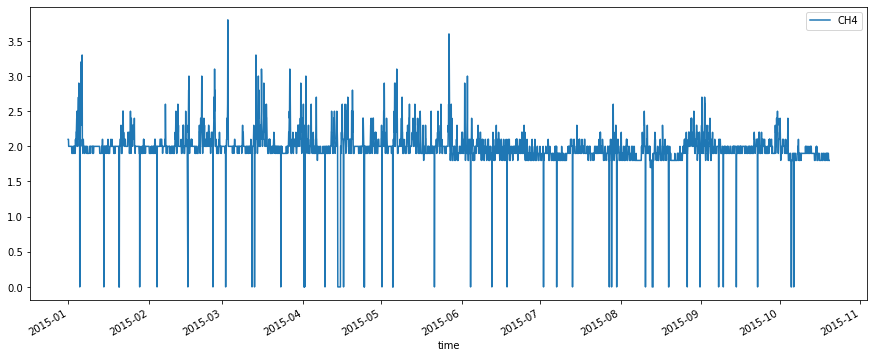

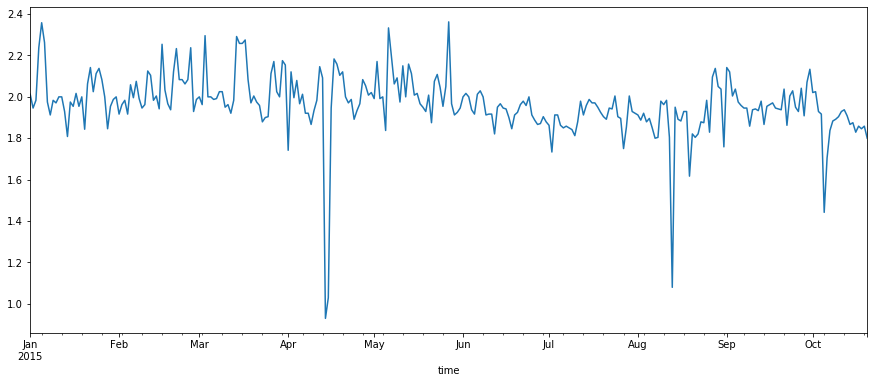

In [28]:
#Dust particles training hourly basis
train.plot(figsize=(15, 6))
plt.show()
#Average Dust particles Daily basis
y.plot(figsize=(15, 6))
plt.show()

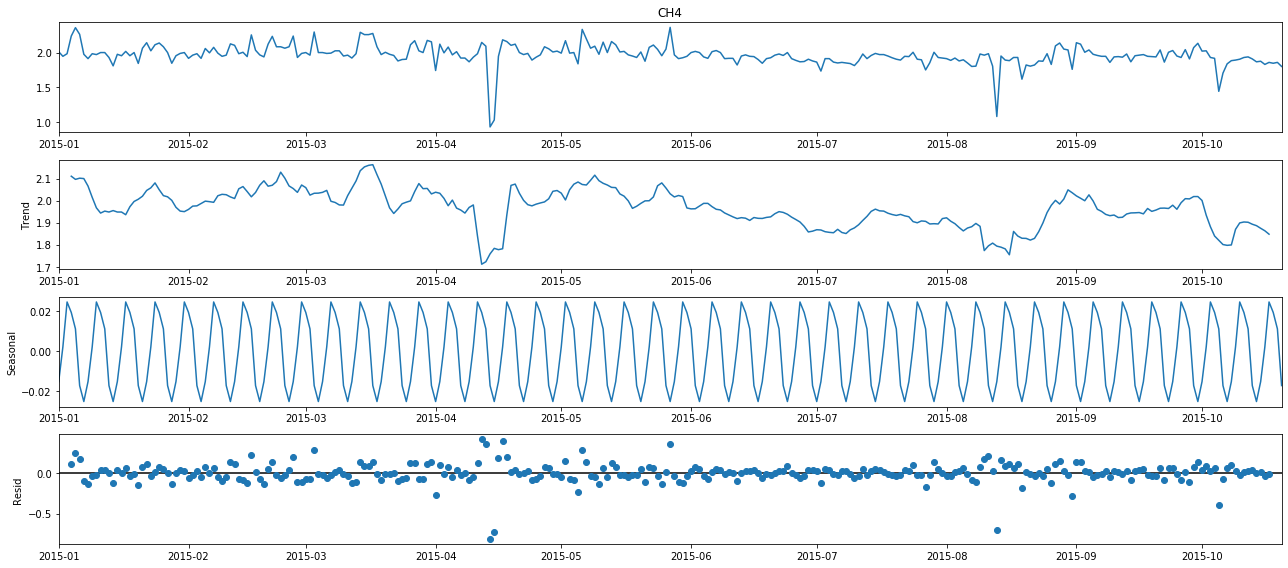

In [29]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [31]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
# Hypothesis 
# H0: Data are stationary 
# H1: Data are not stationary

kpss_test(train)

KPSS Statistic: 2.2285158069926196
p-value: 0.01
num lags: 35
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [32]:
train['CH4']=np.log(train['CH4'])
train.dropna(inplace=True)


C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
from numpy import inf
y_log = train['CH4'].resample('D').mean()

y_log[y_log==-inf] = 0
print(y_log)

time
2015-01-01    0.699246
2015-01-02    0.665363
2015-01-03    0.684191
2015-01-04    0.802030
2015-01-05    0.000000
                ...   
2015-10-16    0.603556
2015-10-17    0.619326
2015-10-18    0.612567
2015-10-19    0.619326
2015-10-20    0.587787
Freq: D, Name: CH4, Length: 293, dtype: float64


In [34]:
train

,CH4
time,
2015-01-01 00:00:00,0.741937
2015-01-01 01:00:00,0.741937
2015-01-01 02:00:00,0.741937
2015-01-01 03:00:00,0.693147
2015-01-01 04:00:00,0.693147
...,...
2015-10-19 21:00:00,0.587787
2015-10-19 22:00:00,0.587787
2015-10-19 23:00:00,0.587787


In [35]:
kpss_test(y_log)

KPSS Statistic: 0.4314260121205337
p-value: 0.06360947753425272
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [36]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
aic=[]
temp=0
lowest=10000000000000000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_log,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append(results.aic)
            temp=results.aic
            if(temp<lowest):
                lowest=temp
                l_param=param
                l_param_seasonal=param_seasonal
            
        except:
            continue
print(min(aic))
print(lowest)
print(l_param)
print(l_param_seasonal)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:568.7093791740485
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:398.16349968480733
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:224.50384870687677
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:36.53104183826034
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:202.20742711620977
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:43.597122205570486
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:136.05365690514714
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:45.84023996785755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:396.8965534058825
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:315.82599765105834
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:223.06326031225882
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:38.64555924036955
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:203.08755684688956
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:46.5219838763945
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:137.89211267733876
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:44.45563437245849
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:203.96330770919928
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:190.00908847195163


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.057137330681893
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:44.02999073989281
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:132.2922736418156
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:45.240731504521676
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:128.15899607312815
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:115.17181423620458
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:356.2738794536423
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:157.23209963375538
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:117.67575877839913
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:115.2822762119039


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:265.4875004855252
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:160.64971456600276
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:8.302268170891901
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:6.720201928046668
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:231.2485160725368
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:45.48662204672707
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:6.393286867455155
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8.688504492503526
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:145.35327703563212
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:55.72574038371256
4.75428978564342
4.75428978564342
(0, 1, 1)
(0, 0, 1, 12)


In [38]:
#ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC,4.75428978564342
mod = sm.tsa.statespace.SARIMAX(y_log,order=l_param,seasonal_order=l_param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
model_fit= mod.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CH4   No. Observations:                  293
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                   0.623
Date:                            Mon, 25 May 2020   AIC                              4.754
Time:                                    13:41:08   BIC                             15.637
Sample:                                01-01-2015   HQIC                             9.120
                                     - 10-20-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9909      0.016    -62.938      0.000      -1.022      -0.960
ma.S.L12      -0.1155      0.087   

In [40]:
model_fit.save('TS_model_for_CH4.pkl')

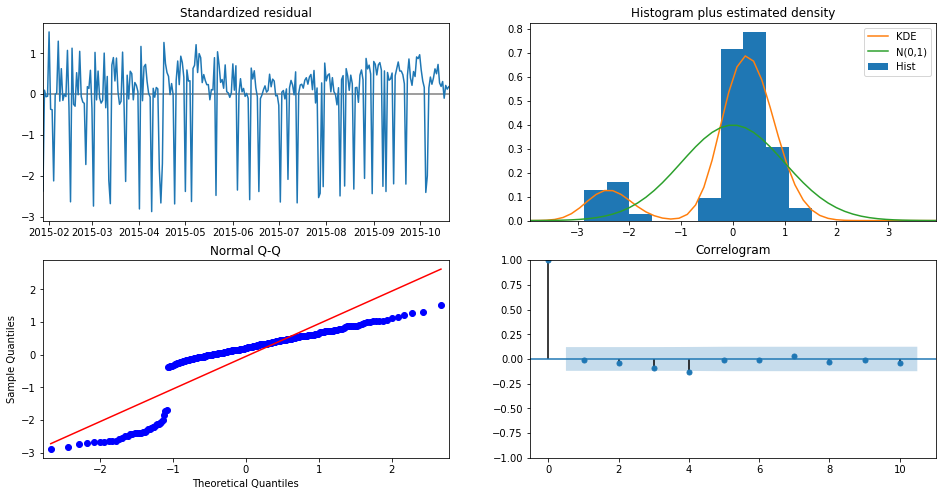

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [50]:
test['CH4']=np.log(test['CH4'])
test.dropna(inplace=True)
test

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,CH4
7000,2015-10-20 02:00:00,0.587787
7001,2015-10-20 03:00:00,0.587787
7002,2015-10-20 04:00:00,0.587787
7003,2015-10-20 05:00:00,0.587787
7004,2015-10-20 06:00:00,0.587787
...,...,...
8745,2015-12-31 19:00:00,0.693147
8746,2015-12-31 20:00:00,0.693147
8747,2015-12-31 21:00:00,0.693147
8748,2015-12-31 22:00:00,0.693147


In [53]:

pred = results.get_prediction(start=pd.to_datetime('2015-08-20'), dynamic=False)
pred_ci = pred.conf_int()

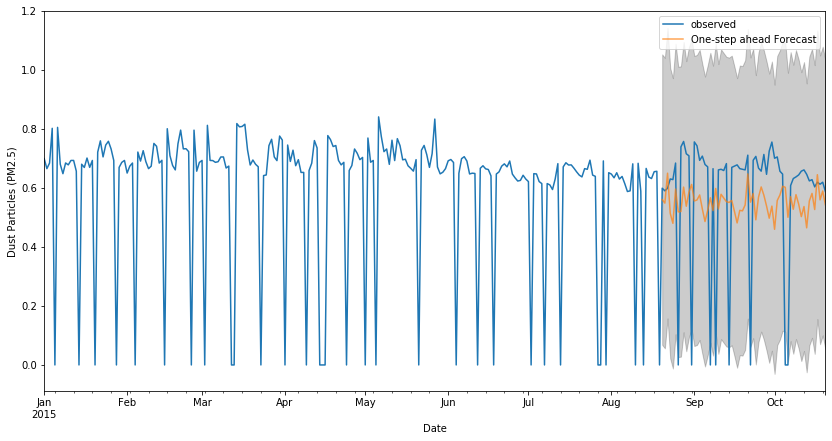

In [55]:
ax = y_log['2015-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CH4')
plt.legend()


In [58]:
y_forecasted = pred.predicted_mean
y_truth = y_log['2015-01-21':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.06
The Root Mean Squared Error of our forecasts is 0.24


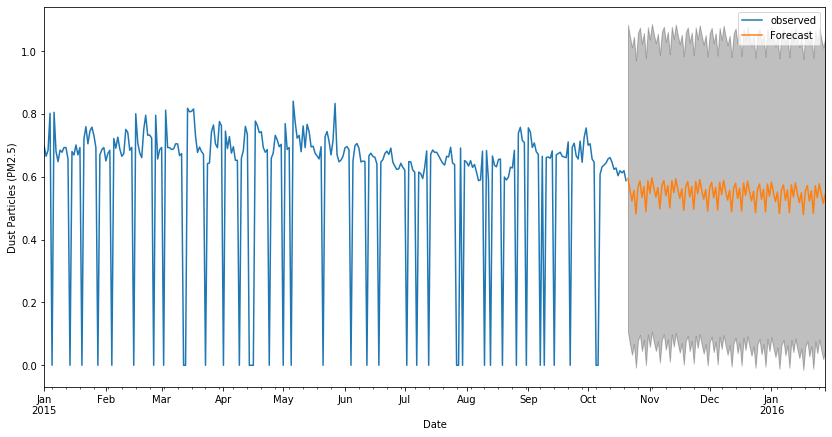

In [59]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y_log.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Dust Particles (PM2.5)')
plt.legend()
plt.show()

In [60]:
model_loaded = AutoRegResults.load('TS_model_for_CH4.pkl')
print(model_loaded.params)

ma.L1      -0.990853
ma.S.L12   -0.115476
sigma2      0.057519
dtype: float64


In [61]:
test

,time,CH4
7000,2015-10-20 02:00:00,0.587787
7001,2015-10-20 03:00:00,0.587787
7002,2015-10-20 04:00:00,0.587787
7003,2015-10-20 05:00:00,0.587787
7004,2015-10-20 06:00:00,0.587787
...,...,...
8745,2015-12-31 19:00:00,0.693147
8746,2015-12-31 20:00:00,0.693147
8747,2015-12-31 21:00:00,0.693147
8748,2015-12-31 22:00:00,0.693147


In [66]:
10**model_loaded.predict('2015-10-19','2015-10-28')

2015-10-19    3.757699
2015-10-20    3.747838
2015-10-21    3.728173
2015-10-22    3.729201
2015-10-23    3.707512
2015-10-24    3.700013
2015-10-25    3.722177
2015-10-26    3.742685
2015-10-27    3.744465
2015-10-28    3.778492
Freq: D, dtype: float64